In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset by pandas
dataset = pd.read_csv('dataset/churn_data.csv') 

In [4]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [12]:
dataset['is_referred'].describe()

count    27000.000000
mean         0.318037
std          0.465723
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_referred, dtype: float64

In [13]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [11]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [18]:
#removing the na value in colum "Age"
dataset[pd.notnull(dataset['age'])]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,580.0,0,0,0,0,0,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,1,26.0,na,NaN,0,0,2,0,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,0,22.0,na,NaN,0,0,37,0,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,1,46.0,na,529.0,2,0,16,2,0,...,0,0,0,0,Aries,1,0,27.0,0.90,1


In [19]:
dataset = dataset[pd.notnull(dataset['age'])]

In [21]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [22]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [25]:
dataset2 = dataset.drop(columns = ['user', 'churn'])
dataset2.shape

(26996, 27)

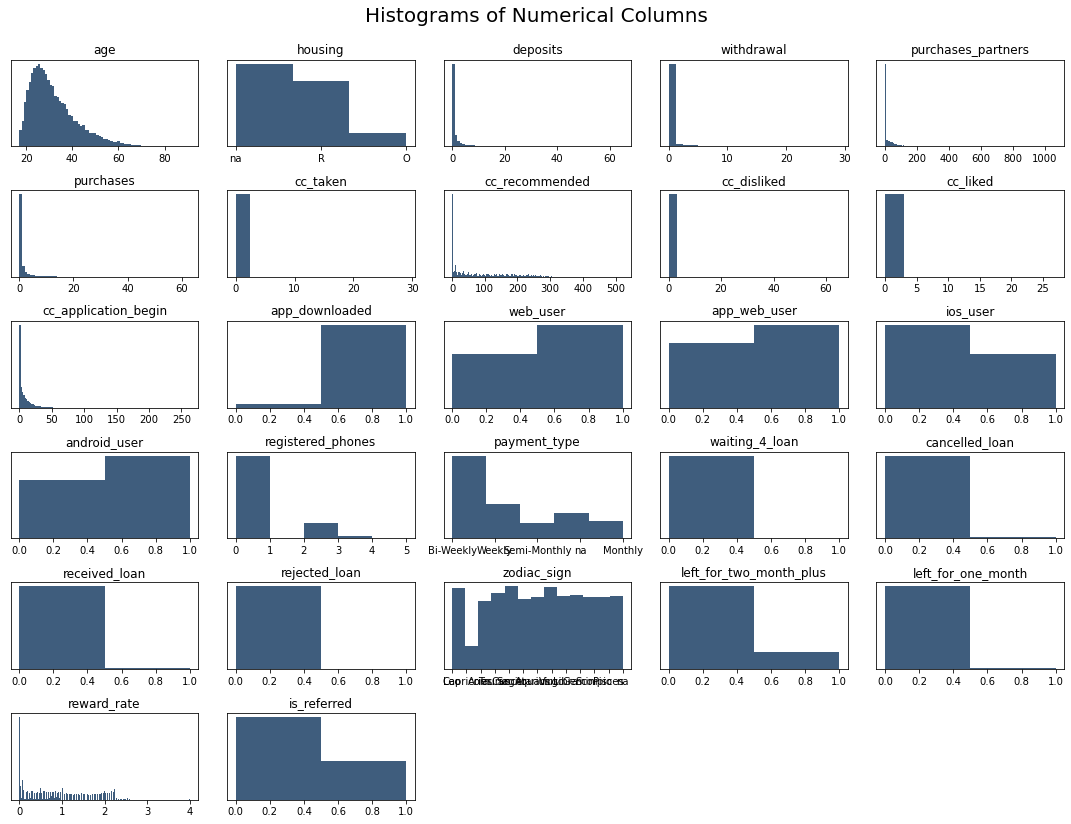

In [23]:
#Data Visualization
#Histogram 
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [26]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

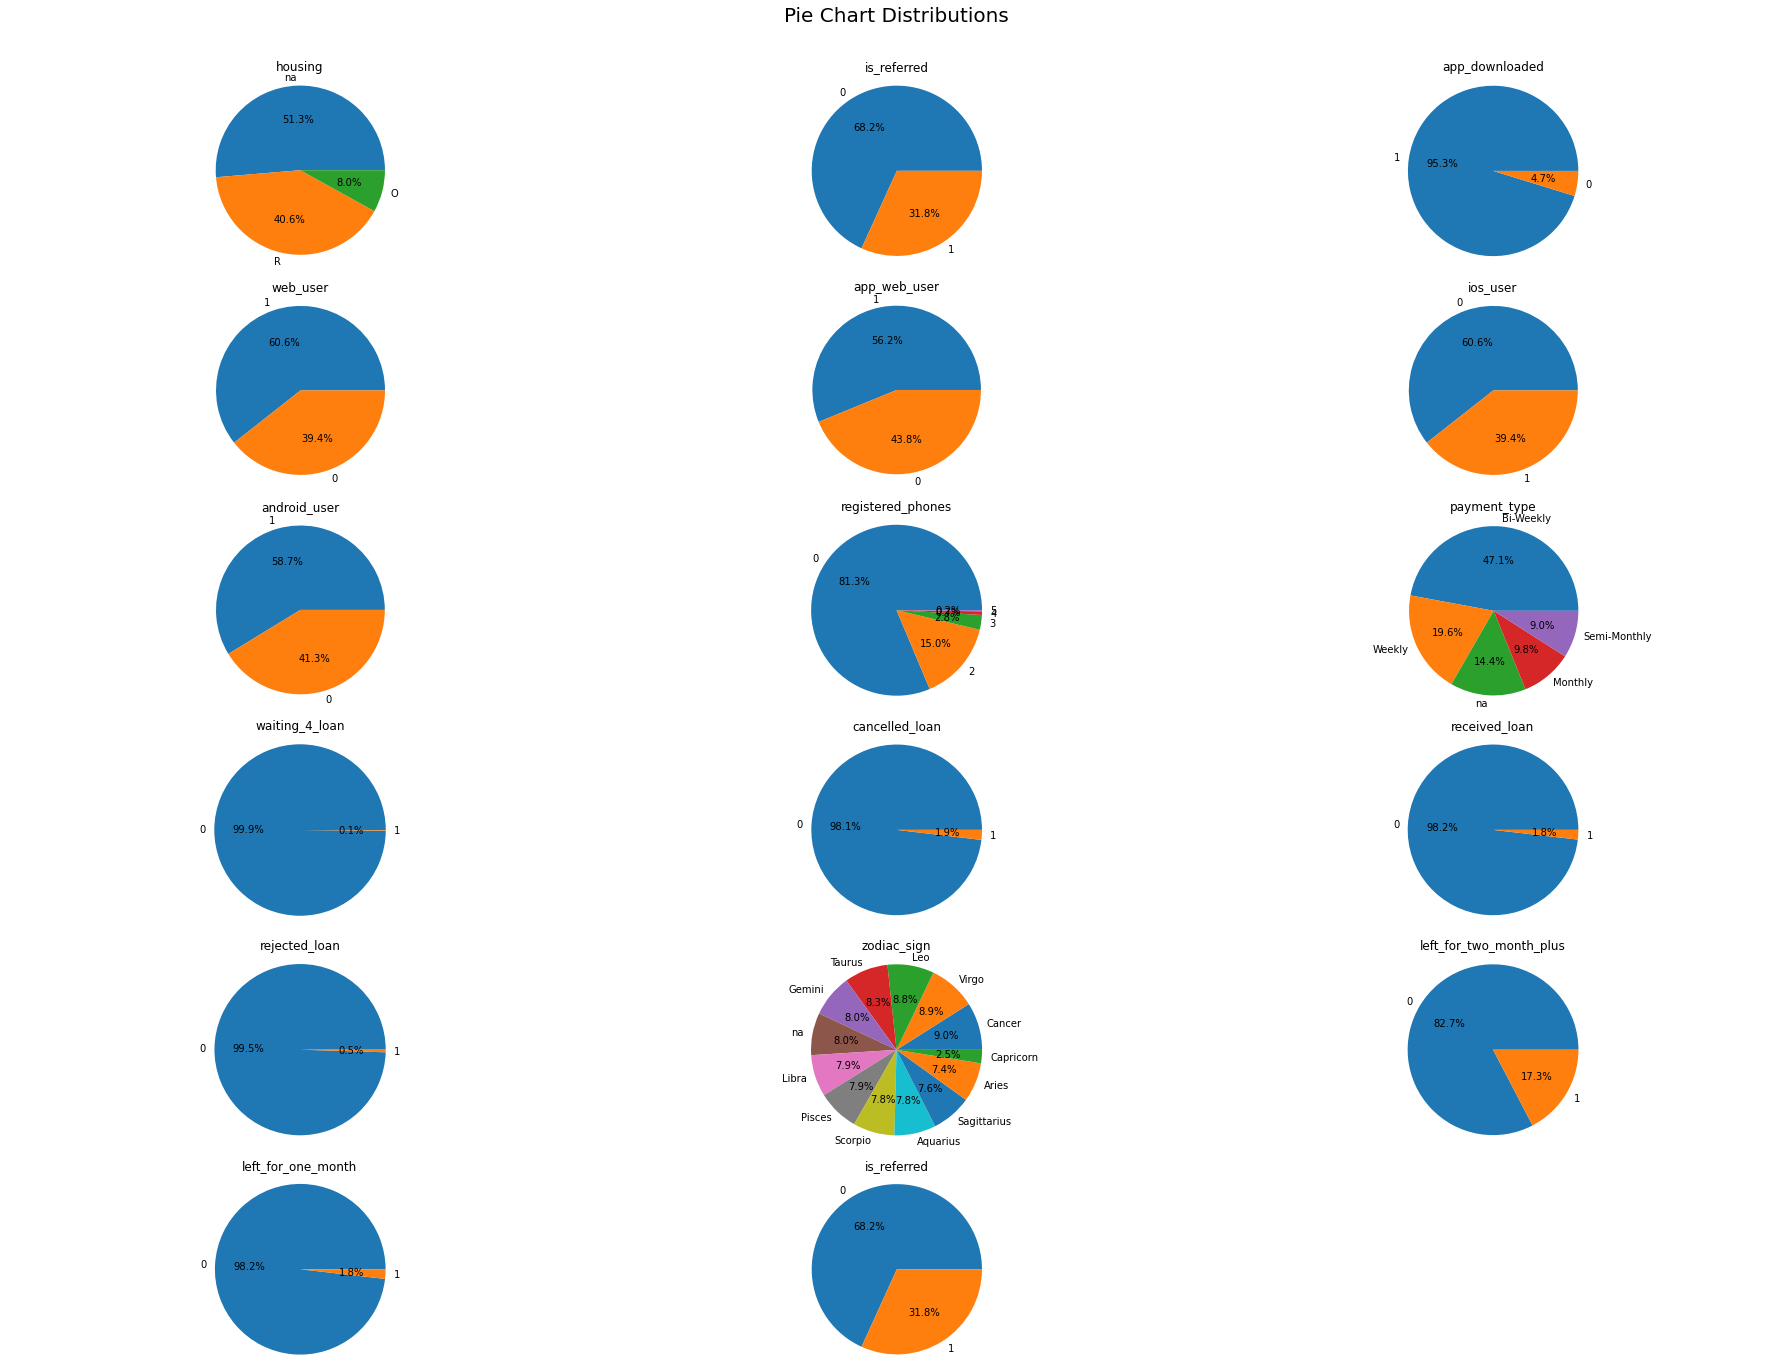

In [29]:
#Building pie chart

fig = plt.figure(figsize=(25, 20))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [31]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()


0    27
1     8
Name: churn, dtype: int64

In [32]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()


1    274
0    234
Name: churn, dtype: int64

In [33]:
dataset[dataset2.received_loan == 1].churn.value_counts()


1    292
0    199
Name: churn, dtype: int64

In [34]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()


1    107
0     25
Name: churn, dtype: int64

In [35]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

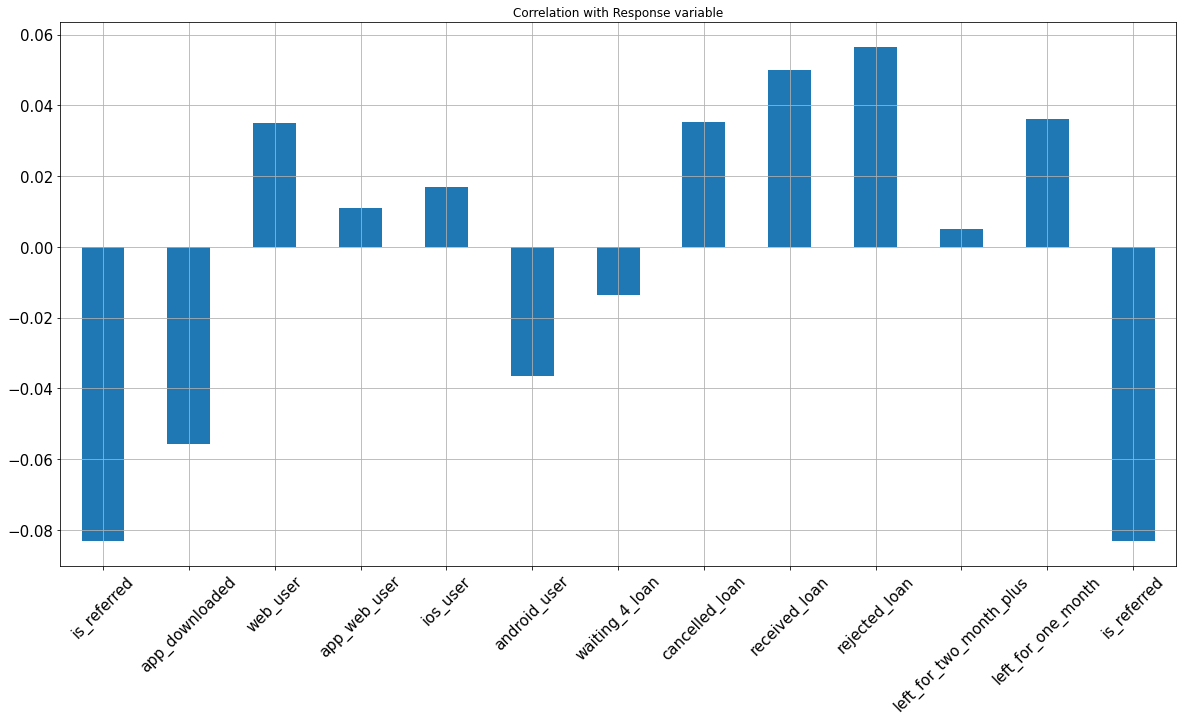

In [36]:
#Building correlation betweens features and churn
dataset3 = dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    )
dataset3.corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

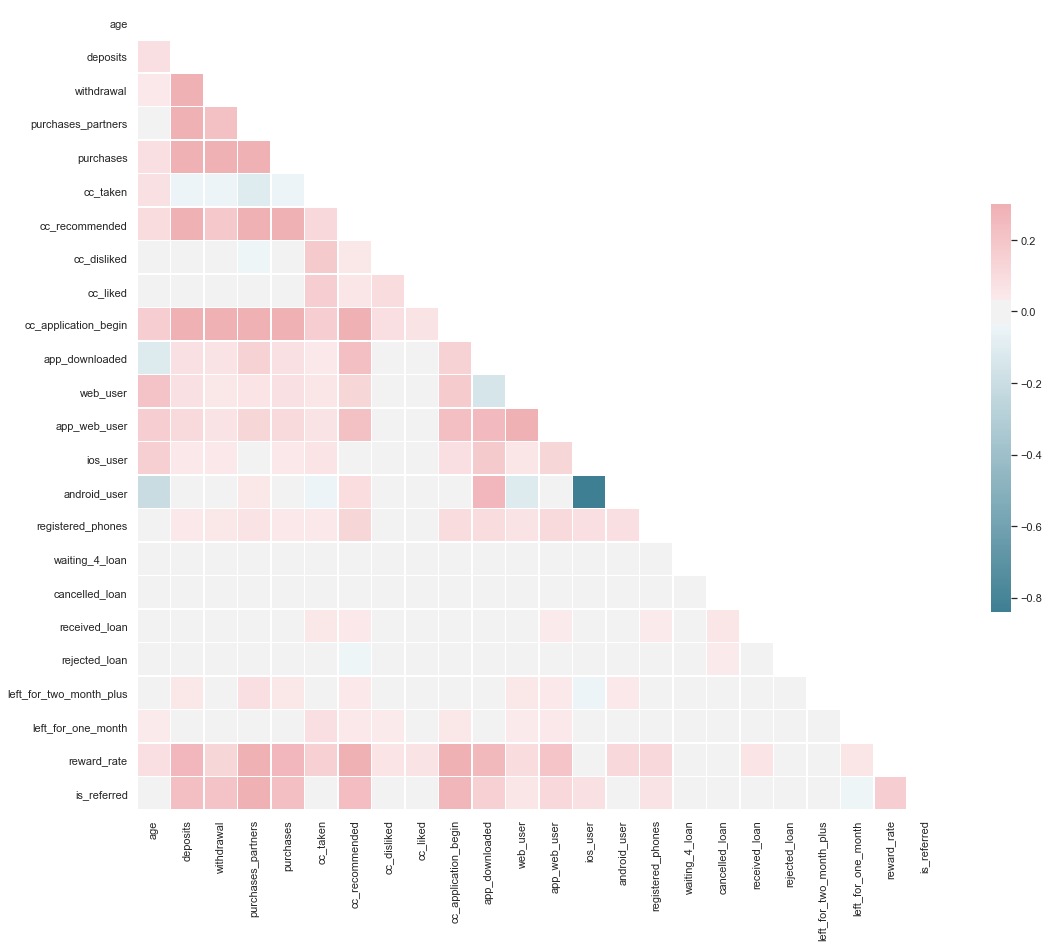

In [39]:
## Heatmap
sns.set(style="white")

# Compute the correlation matrix between all feature except churn
corr = dataset.drop(columns = ['user', 'churn']).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

dataset = dataset.drop(columns = ['app_web_user'])



dataset.to_csv('dataset/new_churn_data.csv', index = False)

In [45]:
#Modelling 
dataset = pd.read_csv('dataset/new_churn_data.csv')


In [46]:
#Preprocessing
#Split the user and the rest of dataset
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [47]:
dataset.head()

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [63]:
dataset.groupby('housing').get_group('R')

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
1,0,28.0,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
5,1,32.0,R,5,3,111,5,0,227,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
8,0,28.0,R,0,0,0,0,2,47,1,...,Bi-Weekly,0,0,0,0,Sagittarius,0,0,0.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26985,0,31.0,R,0,0,22,0,0,138,0,...,Monthly,0,0,0,0,Virgo,0,0,1.63,0
26986,0,29.0,R,1,1,70,1,0,147,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,1.07,1
26988,1,20.0,R,0,0,2,0,0,5,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.13,0
26990,1,28.0,R,0,0,26,0,0,31,0,...,Monthly,0,0,0,0,Virgo,0,0,0.60,0


In [73]:
# One-Hot Encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [76]:

# Create dumies variable for the categorical features
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [77]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [83]:
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [84]:

# Standard Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [85]:
# Fitting Logistic Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [88]:
# Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [89]:
print("the accuracy is", accuracy_score(y_test, y_pred))

the accuracy is 0.5929629629629629


In [90]:
# tp / (tp + fp)
print(' the precision is',precision_score(y_test, y_pred) )


 the precision is 0.7195121951219512


In [91]:
# tp / (tp + fn)
print('the recall ratio is', recall_score(y_test, y_pred) 
     )

recall ratio is 0.026410026857654433


In [93]:
# F1 score
print('the f1 score is',f1_score(y_test, y_pred))

the f1 score is 0.05094991364421417


Test Data Accuracy: 0.5930


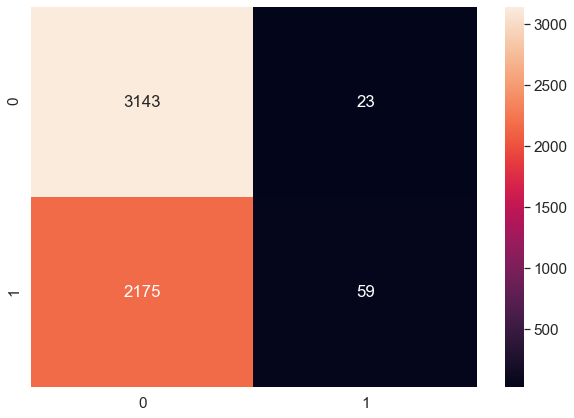

In [95]:
#Confusion matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [97]:

#Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [98]:
# Coefficients for each Feature, there are some feature seems more important than other
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.182838
1,deposits,0.454921
2,withdrawal,0.069728
3,purchases_partners,-1.018286
4,purchases,-0.597531
5,cc_taken,0.165034
6,cc_recommended,0.237841
7,cc_disliked,-0.009203
8,cc_liked,-0.022152
9,cc_application_begin,0.079530


In [99]:
## Feature Selection
##RFE means: Random Feature Elimination 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [101]:
X_train.shape

(78568, 41)

In [102]:
# Model to Test
classifier = LogisticRegression()
# Select Best 20 Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)


In [104]:
# summarize the selection of the attributes
print(rfe.support_)


[ True  True False  True  True  True  True False False  True False  True
 False False False  True  True  True  True  True False  True  True False
  True False False  True  True  True False False False False False False
 False False False False  True]


In [105]:
print(rfe.ranking_)


[ 1  1  4  1  1  1  1 20 13  1 12  1  3  2 11  1  1  1  1  1  7  1  1 21
  1  9 19  1  1  1  8 10 22 14 16  5  6 18 17 15  1]


In [106]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_application_begin', 'web_user', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'reward_rate', 'is_referred', 'housing_R',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Virgo'],
      dtype='object')

In [107]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

In [110]:
cm = confusion_matrix(y_test, y_pred)

In [111]:
print("the accuracy is", accuracy_score(y_test, y_pred))

the accuracy is 0.5912962962962963


In [112]:
print(' the precision is',precision_score(y_test, y_pred) )


 the precision is 0.6666666666666666


In [113]:
print('the recall ratio is', recall_score(y_test, y_pred))

the recall ratio is 0.024171888988361683


In [114]:
print('the f1 score is',f1_score(y_test, y_pred))

the f1 score is 0.04665226781857451


Test Data Accuracy: 0.5913


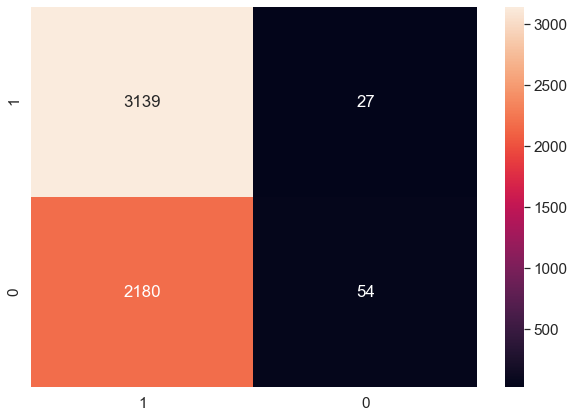

In [115]:

#Visualize the final result
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [117]:


# Analyzing Coefficients for the best 20 features

pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)





,features,coef
0,age,-0.171980
1,deposits,0.375883
2,purchases_partners,-1.009142
3,purchases,-0.470185
4,cc_taken,0.165990
5,cc_recommended,0.250281
6,cc_application_begin,0.079394
7,web_user,0.126088
8,waiting_4_loan,-0.276636
9,cancelled_loan,0.118247


In [119]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

final_results


,user,churn,predicted_churn
0,61353,1.0,0
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,0
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,0
5397,23740,0.0,0
5398,47663,1.0,0
